In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
#To make it compatible with jupyter notebook
%matplotlib inline
# Fixing random state for reproducibility
np.random.seed(1)

## Preparing Data

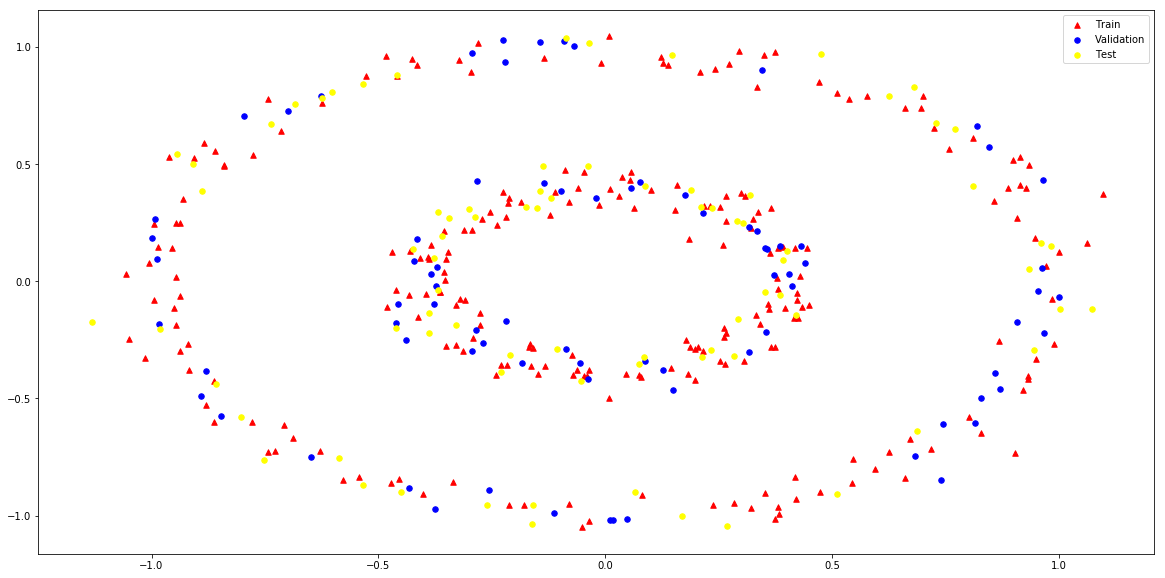

Data Distributions stats:
(2, 240)
(2, 80)
(2, 80)
(1, 240)
(1, 80)
(1, 80)


In [2]:
# Data generating and spliting work is done in "./Task_02_dataset.ipynb" file 
%run "./Task_02_dataset.ipynb"

print("Data Distributions stats:")
print(Train_Data["X"].shape)
print(Validation_Data["X"].shape)
print(Test_Data["X"].shape)

print(Train_Data["Y"].shape)
print(Validation_Data["Y"].shape)
print(Test_Data["Y"].shape)


## Implementing 1 hidden layer
### Functions

In [3]:
def sigmoid (x):
    '''
    Parameters:
    x - input
    
    Returns:
    answer - The sigmoid vaue of 'x'
    '''
    answer = 1/(1 + np.exp(-x))
    return answer

In [4]:
def initializeParameters (inputDimension, hiddenUnits, outputUnits, activation):
    '''
    Parameters:
    inputDimension = the dims of input vector
    hiddenUnits = The number of neurons in the hidden layer
    outputUnits = The number of neurons in output layer
    activation  = the activation function to be used, sigmoid in this case

    Returns:
    Model = the class instance with 'W1',  the weigths matrix with weights vector for each neuron (input to hidden)
                                    'W2',  the weigths matrix with weights vector for each neuron (hidden to output)
                                    'b1',  the bias vector
                                    'b2',  the bias vector
                                and 'activation'
    Info:
        W1.shape = (hiddenUnits, inputDimension)
        W2.shape = (outputUnits, hiddenUnits)
        b1.shape = (hiddenUnits, 1)
        b2.shape = (outputUnits, 1)
    '''
    Model = None
    
    W1 = np.random.randn(hiddenUnits, inputDimension) * 0.01
    W2 = np.random.randn(outputUnits, hiddenUnits) * 0.01
    
    #print(W1.shape)
    #print(W2.shape)
    
    b1 = np.zeros((hiddenUnits, 1))
    b2 = np.zeros((outputUnits, 1))
    
    Model = {
        "W1": W1,
        "W2": W2, 
        "b1": b1,
        "b2": b2,
        "activation": activation
    }
    
    return Model

In [5]:
def  forwardPropagation (model, X):
    '''
    Parameters:
    model = perceptron class instance, where it is the model initialized using initializeParameters
    X =     [[all dim1 vals], [all dim2 vals]]    i.e.inputs stacked vertically

    Returns:
    modelOutput = The class instance with 'x', 'Z1', 'A1' and 'Z2', 'A2' in it
    '''
    W1 = model["W1"]
    W2 = model["W2"]
    b1 = model["b1"]
    b2 = model["b2"]
    activation = model["activation"]
    
    
    Z1 = np.dot(W1, X) + b1
    
    if(activation == "sigmoid"):
        A1 = sigmoid(Z1)
    else:
        print("Activation function error")
    
    Z2 = np.dot(W2, A1) + b2   
    
    '''
    print("FP X: " + str(X.shape))
    print("FP W1: " + str(W1.shape))
    print("FP b1: " + str(b1.shape))
    print("FP Z1: " + str(Z1.shape))    
    print("FP A1: " + str(A1.shape))
    print("FP W2: " + str(W2.shape))
    print("FP b2: " + str(b2.shape))
    print("FP Z2: " + str(Z2.shape))
    '''
        
    if(activation == "sigmoid"):
        A2 = sigmoid(Z2)
    else:
        print("Activation function error")
    
    # print("FP A2: " + str(A2.shape))
    
    modelOutput = {
        "X": X,
        "Z1": Z1,
        "Z2": Z2,
        "A1": A1,
        "A2": A2
    }
    return modelOutput

In [6]:
def  lossCalculation(modelOutput, actual_target):
    '''
    Parameters:
    modelOutput = it is the output of the forward propagation of the model
    actual_target = Ground Truth for all the labels

    Returns:
    loss = The logistic cross entropy loss
    '''
    
    y = actual_target
    a = modelOutput["A2"]
    m = a.shape[1]
    
    loss = -(1/m) * (np.sum((y*np.log(a))) + np.sum(((1-y)*np.log(1-a))))
    
    return loss

In [7]:
def  backprop(model, modelOutput, y_hat):
    '''
    Parameters:
    model : perceptron class instance (W, b, activation)
    modelOutput: output of forward prop function
    
    Returns:
    gradient = The strcture with gradients (dW1, dW2, db1 and db2) for updating weights
    '''
    #model struct
    W1 = model["W1"]
    W2 = model["W2"]
    b1 = model["b1"]
    b2 = model["b2"]
    '''
    print("BP W1: " + str(W1.shape))
    print("BP W2: " + str(W2.shape))
    print("BP b1: " + str(b1.shape))
    print("BP b2: " + str(W2.shape))
    '''
    #modeloutput struct
    X = modelOutput["X"]
    Z1 = modelOutput["Z1"]
    A1 = modelOutput["A1"]
    Z2 = modelOutput["Z2"]
    A2 = modelOutput["A2"]
    
    '''
    print("BP X: " + str(X.shape))
    print("BP Z1: " + str(Z1.shape))
    print("BP A1: " + str(A1.shape))
    print("BP Z2: " + str(Z2.shape))
    print("BP A2: " + str(A2.shape))
    '''
    
    
    m = X.shape[1]
        
    #print(A2.shape)
    #print(y_hat.shape)
    
    dZ2 = A2 - y_hat
    dW2 = (1/m)*(np.dot(dZ2, A1.T))
    db2 = (1/m)*(np.sum(dZ2, axis = 1, keepdims = True))
    
    #print("khappy: " + str(db2.shape))
    
    #print(W2.T.shape)
    #print(dZ2.shape)
    
    dZ1 = np.dot(W2.T, dZ2) * (1 - (A1*A1))
    
    # print("dZ1: " + str(dZ1.shape))
    
    dW1 = (1/m)*(np.dot(dZ1, X.T))
    db1 = (1/m)*(np.sum(dZ1, axis = 1, keepdims = True))
    
    
    gradient = {
        "dW2": dW2,
        "dW1": dW1,
        "db1": db1,
        "db2": db2
    }
    
    return gradient


In [8]:
def  weightUpdate (model, gradient, lr_rate):
    '''
    Parameters:
    model : perceptron class instance
    gradients : backprop function output
    lr_rate: learning rate 
    
    Returns:
    model = perceptron class instance
    '''
    
    W1 = model["W1"]
    W2 = model["W2"]
    b1 = model["b1"]
    b2 = model["b2"]
    
    dW1 = gradient["dW1"]
    dW2 = gradient["dW2"]
    db1 = gradient["db1"]
    db2 = gradient["db2"]
    
    '''
    print("WU W1: " + str(W1.shape))
    print("WU W2: " + str(W2.shape))
    print("WU b1: " + str(b1.shape))
    print("WU b2: " + str(b2.shape))
    
    print("WU dW1: " + str(dW1.shape))
    print("WU dW2: " + str(dW2.shape))
    print("WU db1: " + str(db1.shape))
    print("WU db2: " + str(db2.shape))
    '''
    model["W1"] = W1 - (lr_rate*dW1)
    model["b1"] = b1 - (lr_rate*db1)
    
    model["W2"] = W2 - (lr_rate*dW2)
    model["b2"] = b2 - (lr_rate*db2)
    
    
    return model


In [9]:
def trainModel( model, trainingData, ValidationData, numberOfEpochs = 10000, lr_rate = 0.01):
    '''
    Parameters:
    model : perceptron class instance
    trainingData : instance with ('X' and 'Y' stacked in it)
    ValidationData : instance with ('X' and 'Y' stacked in it)
    numberOfEpochs : int number
    lr_rate: learnign rate (int value)
    
    Returns:
    model = perceptron class instance
    '''
    train_X = trainingData["X"]
    train_Y = trainingData["Y"]
    #print(train_X)
    #print(train_Y)
    
    val_X = ValidationData["X"]
    val_Y = ValidationData["Y"]
    #print(val_X)
    #print(val_Y)
    
    All_Train_Loss = []
    All_Val_Loss = []
    
    
    for i in range(1, numberOfEpochs+1):        
        Trn_modelOutput = forwardPropagation(model, train_X)
        Trn_loss = lossCalculation(Trn_modelOutput, train_Y)
        All_Train_Loss.append(Trn_loss)
        
        Trn_gradient = backprop(model, Trn_modelOutput, train_Y)

        model = weightUpdate(model, Trn_gradient, lr_rate)
        
        Val_modelOutput = forwardPropagation(model, val_X)
        Val_loss = lossCalculation(Val_modelOutput, val_Y)
        All_Val_Loss.append(Val_loss)
        
        if((i%500 == 0) or (i in range(1, 10+1))):  #print for first 10, then after every 50
            print("epoch #"+ str(i) + ": \tTrain Loss = "+ str(Trn_loss) + "\t\t Validation Loss = " + str(Val_loss))
        #print("-------------------------------")
    
    return model, All_Train_Loss, All_Val_Loss


In [10]:
def evaluate_model(model, test_data, target ):
    '''
    Parameters:
    model : perceptron class instance
    test_data : input vector of test dataset
    target : Ground truth for test dateset
    
    Returns:
    accuracy, precision, recall, loss
    '''
    X = test_data
    Y = target
    
    modelOutput = forwardPropagation (model, X)
    temp = modelOutput["A2"] > 0.5
    temp = temp.astype(int)
    predictions = temp
    loss = lossCalculation(modelOutput, Y)
    
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    accuracy = None
    precision = None
    recall = None
    
    for i in range(0, target.shape[1]):
        if((predictions[0, i] == 0) and (target[0, i] == 0)):
            TN = TN + 1
        elif((predictions[0, i] == 0) and (target[0, i] == 1)):
            FN = FN + 1
        elif((predictions[0, i] == 1) and (target[0, i] == 0)):
            FP = FP + 1
        elif((predictions[0, i] == 1) and (target[0, i] == 1)):
            TP = TP + 1
    
    if((TP+FP) != 0):
        precision = (TP)/(TP+FP)
    if((TP+TN) != 0):
        recall = (TP)/(TP+TN)
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    
    print("True Positives: \t" + str(TP))
    print("False Positives: \t" + str(FP))
    print("True Negatives: \t" + str(TN))
    print("False Negatives: \t" + str(FN))
    
    return accuracy, precision, recall, loss


### Usage of above function

In [11]:
np.random.seed(2)
hu = 6
lr = 1
Model = initializeParameters(inputDimension = dims, hiddenUnits = hu, outputUnits = 1, activation = "sigmoid")
Model, TrainLosses, ValLosses = trainModel( Model, Train_Data, Validation_Data, numberOfEpochs = 7500, lr_rate = lr)

epoch #1: 	Train Loss = 0.6931471227711972		 Validation Loss = 0.6931473573122291
epoch #2: 	Train Loss = 0.6931471172229239		 Validation Loss = 0.6931473702510864
epoch #3: 	Train Loss = 0.6931471137785817		 Validation Loss = 0.6931473824928596
epoch #4: 	Train Loss = 0.69314711062999		 Validation Loss = 0.6931473944043269
epoch #5: 	Train Loss = 0.6931471075228504		 Validation Loss = 0.6931474061826866
epoch #6: 	Train Loss = 0.6931471044213596		 Validation Loss = 0.6931474179103706
epoch #7: 	Train Loss = 0.6931471013204382		 Validation Loss = 0.6931474296195854
epoch #8: 	Train Loss = 0.6931470982193271		 Validation Loss = 0.6931474413226941
epoch #9: 	Train Loss = 0.6931470951178742		 Validation Loss = 0.6931474530244778
epoch #10: 	Train Loss = 0.6931470920160137		 Validation Loss = 0.6931474647268552
epoch #500: 	Train Loss = 0.6931444307587351		 Validation Loss = 0.6931575291059894
epoch #1000: 	Train Loss = 0.6931325806037345		 Validation Loss = 0.6932032688817081
epoch #1500:

first: 	 Train = 0.6931471227711972		 Val:0.6931473573122291
Last: 	 Train = 0.38744014827685735		 Val:0.3882225827743389
Difference: 	 Train = -0.3057069744943398		 Val:-0.3049247745378902


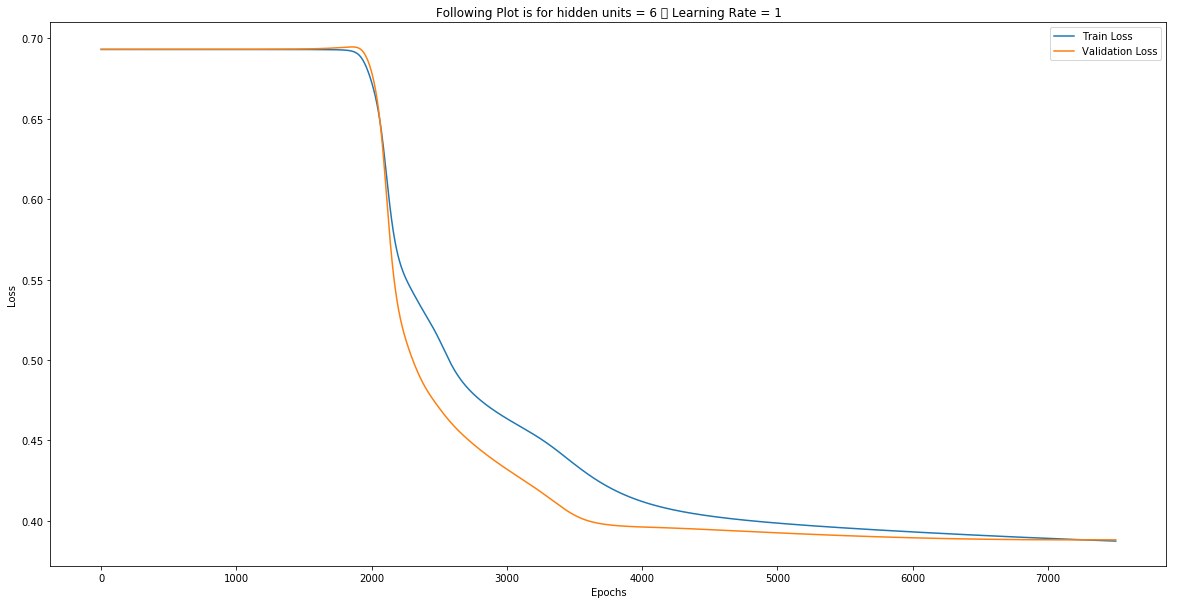

In [12]:
plt.figure(figsize=(20,10))
x1 = np.arange(1, len(TrainLosses)+1)
y1 = np.array(TrainLosses)
x1.shape = (x1.shape[0], 1)
y1.shape = (y1.shape[0], 1)

x2 = np.arange(1, len(ValLosses)+1)
y2 = np.array(ValLosses)
x2.shape = (x2.shape[0], 1)
y2.shape = (y2.shape[0], 1)

plt.title("Following Plot is for hidden units = "+ str(hu)+ " \t Learning Rate = "+str(lr))
plt.plot(x1, y1, label="Train Loss")
plt.plot(x2, y2, label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')

print("first: \t Train = " + str(TrainLosses[0]) + "\t\t Val:" + str(ValLosses[0]))
print("Last: \t Train = " + str(TrainLosses[-1]) + "\t\t Val:" + str(ValLosses[-1]))
print("Difference: \t Train = " + str(TrainLosses[-1] - TrainLosses[0]) + "\t\t Val:" + str(ValLosses[-1] - ValLosses[0]))

plt.show()
#plt.savefig("./images/Task02/hu_"+str(hu)+"_lr_"+str(lr))


In [13]:
accuracy, precision, recall, loss = evaluate_model(Model, Test_Data["X"], Test_Data["Y"])
print("-------------------------------")
print("Accuracy: \t" + str(accuracy))
print("Precision: \t" + str(precision))
print("Recall: \t" + str(recall))
print("Loss: \t\t" + str(loss))

True Positives: 	38
False Positives: 	14
True Negatives: 	26
False Negatives: 	2
-------------------------------
Accuracy: 	0.8
Precision: 	0.7307692307692307
Recall: 	0.59375
Loss: 		0.45461123119661445


### Model Visualization

No handles with labels found to put in legend.


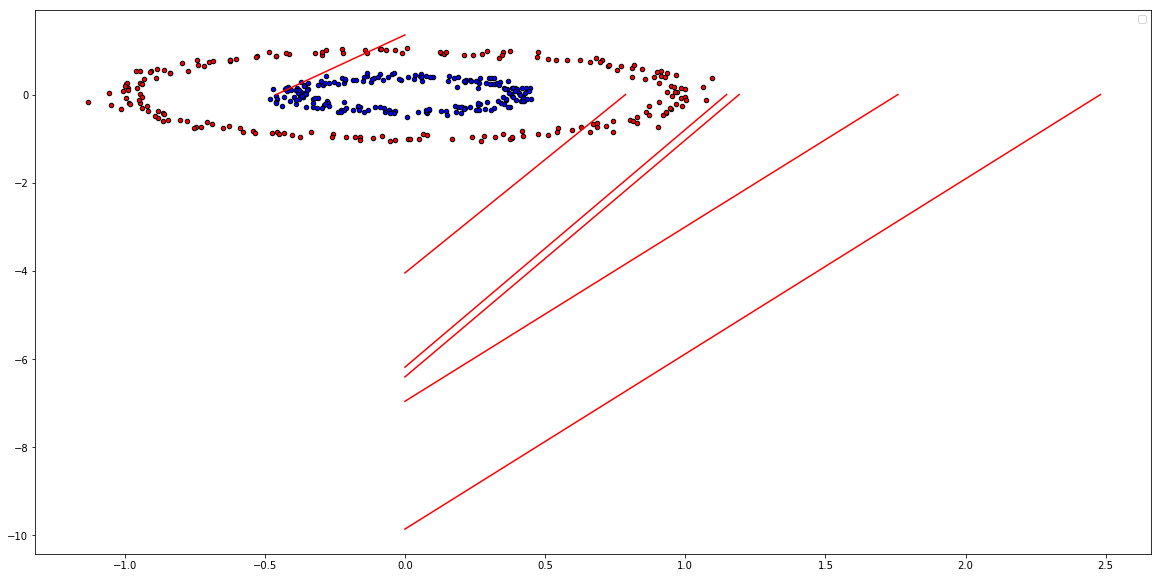

In [32]:
#following piece of code is not working properly

plt.figure(figsize = (20, 10))
#print(Model["W1"].shape)
for i in range(0, Model["W1"].shape[0]):
    w1 = Model["W1"][i, 0]
    w2 = Model["W1"][i, 1]
    b = Model["b1"][i, 0]
    x = -b / w1
    y = -b / w2

    d = y
    c = -y / x

    line_x_coords = np.array([0, x])
    line_y_coords = c * line_x_coords + d

    line_x_coords.shape = (1, line_x_coords.shape[0])
    line_y_coords.shape = (1, line_y_coords.shape[0])
    #print(i)
    #print(line_x_coords.shape)
    #print(line_y_coords.shape)
    
    plt.plot(line_x_coords[0, :], line_y_coords[0, :], 'r-')

plt.scatter(X[reds, 0], X[reds, 1], c = "red",s = 20, edgecolor = 'k')
plt.scatter(X[blues, 0], X[blues, 1], c = "blue", s = 20, edgecolor = 'k')

plt.legend(loc='best')


In [279]:
'''
# 
# This piece of code was written just to save plots
#

for i in range(2, 10):
    Train_Loss = T_Loss_stat["h"+str(i)]
    Val_Loss = V_Loss_stat["h"+str(i)]

    plt.figure(figsize=(20,10))
    x1 = np.arange(1, len(Train_Loss)+1)
    y1 = np.array(Train_Loss)
    x1.shape = (x1.shape[0], 1)
    y1.shape = (y1.shape[0], 1)

    x2 = np.arange(1, len(Val_Loss)+1)
    y2 = np.array(Val_Loss)
    x2.shape = (x2.shape[0], 1)
    y2.shape = (y2.shape[0], 1)


    plt.plot(x1, y1, label="Train Loss")
    plt.plot(x2, y2, label="Validation Loss")
    plt.title("Following Plot is for hidden units = " + str(i) + "\t Learning Rate = "+str("0.1"))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='best')
    print("first: \t Train = " + str(Train_Loss[0]) + "\t\t Val:" + str(Val_Loss[0]))
    print("Last: \t Train = " + str(Train_Loss[-1]) + "\t\t Val:" + str(Val_Loss[-1]))
    print("Difference: \t Train = " + str(Train_Loss[-1] - Train_Loss[0]) + "\t\t Val:" + str(Val_Loss[-1] - Val_Loss[0]))

    #plt.show()
    plt.savefig("./images/Task02/hu_"+str(i))
    
'''

'\n#\n#This is piece of code was written just to save plots\n#\n\nfor i in range(2, 10):\n    Train_Loss = T_Loss_stat["h"+str(i)]\n    Val_Loss = V_Loss_stat["h"+str(i)]\n\n    plt.figure(figsize=(20,10))\n    x1 = np.arange(1, len(Train_Loss)+1)\n    y1 = np.array(Train_Loss)\n    x1.shape = (x1.shape[0], 1)\n    y1.shape = (y1.shape[0], 1)\n\n    x2 = np.arange(1, len(Val_Loss)+1)\n    y2 = np.array(Val_Loss)\n    x2.shape = (x2.shape[0], 1)\n    y2.shape = (y2.shape[0], 1)\n\n\n    plt.plot(x1, y1, label="Train Loss")\n    plt.plot(x2, y2, label="Validation Loss")\n    plt.title("Following Plot is for hidden units = " + str(i) + "\t Learning Rate = "+str("0.1"))\n    plt.xlabel(\'Epochs\')\n    plt.ylabel(\'Loss\')\n    plt.legend(loc=\'best\')\n    print("first: \t Train = " + str(Train_Loss[0]) + "\t\t Val:" + str(Val_Loss[0]))\n    print("Last: \t Train = " + str(Train_Loss[-1]) + "\t\t Val:" + str(Val_Loss[-1]))\n    print("Difference: \t Train = " + str(Train_Loss[-1] - Train_